<h2 style='text-align:center;font-size:80px;background-color:purple;border:80px;color:white'>   Customer Churn Analysis Project . <h2>

# Problem Statement:


## Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

## Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

## Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

## You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# *************************************************************************************

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## The Total number of Rows are 7043 and 21 Columns

In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4562,5322-TEUJK,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.60,8100.25,No
6170,2220-IAHLS,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.40,19.4,No
4361,8680-CGLTP,Male,0,No,No,29,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2,No
150,3780-YVMFA,Female,0,Yes,Yes,8,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,68.55,564.35,No
101,3679-XASPY,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.45,19.45,No


#### We cant see null values in the dataset even after shuffeling so now We will see it through isnull command

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Now lets identify which types of data types do they all belongs

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### We can see that our churn columns is in Object type which make it a classification problem

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:white'> EDA <h2>

In [7]:
# To get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset .... Here we can see that all the columns counts are equal which means that there is no Missing values

# NOW LETS CHECK THE NULL VALUES

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Here it is showing that there are 0 null values in all the columns ,so no missing values are present

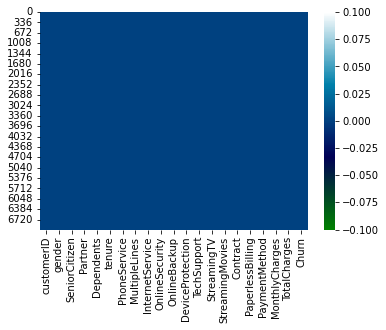

In [9]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="ocean")
plt.show()

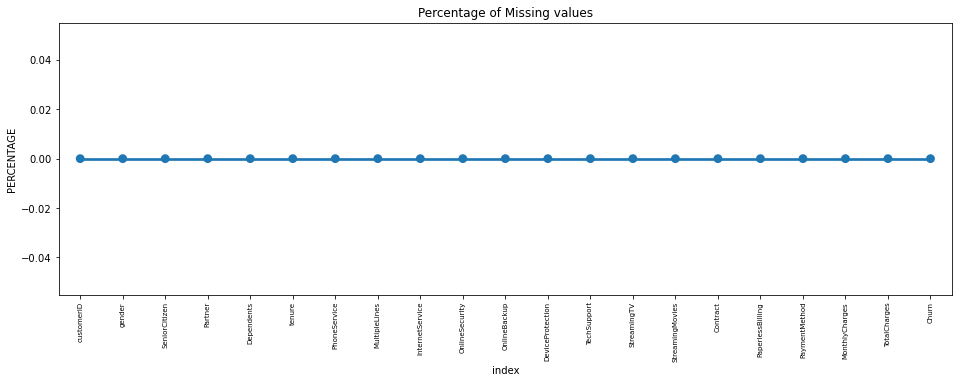

In [10]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# Observation :- We can see that there is no missing values in all the columns

In [11]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('---------------------------------------------------------------------------------------')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64



---------------------------------------------------------------------------------------
Male      3555
Female    3488
Name: gender, dtype: int64



---------------------------------------------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64



---------------------------------------------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64



---------------------------------------------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64



---------------------------------------------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0     

## Observation

- **We will Drop customer id**
- **Number of males are more than female**
- **Senior citizen are less in value count**
- **In TotalCharges we can see that 11 rows of the columns have been left blank with any explanation**
- **Churn column which is a Target variable seems to be imbalanced**

In [12]:
#Lets check the Unique Values in each columns
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Its a classification problem as there are only 2 classes inside Churn which is of Object type

In [13]:
# Checking the space in TotalCharges column as 11 rows have been left without any Explanation
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### We can see left spaces in total charges so lets fill it with np.nan ,so that we can know it is a missing value

In [14]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

## Now we have replaced all the missing value with np.nan ,so Now lets fill the nan value but before filling the nan value lets convert the data type of TotalCharge which is in object to float time as it is format of continous data

In [15]:
# Converting object data type to float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

## Now Lets check null values again and fill it with median as it is a continious data

In [16]:
# Let's check the null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
print ("Median :-" ,df["TotalCharges"].median())
# Filling null values in TotalCharges with its mean 
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

Median :- 1397.475


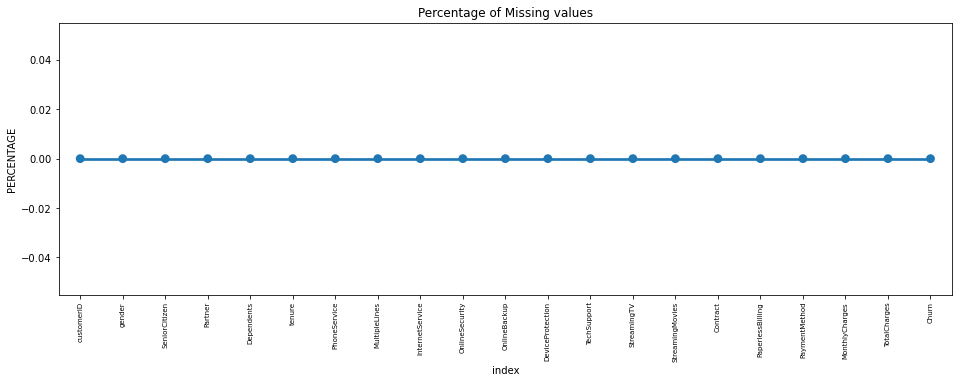

In [18]:
#Checking missing value Graphically
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Now it is been removed

In [19]:
# Lets Check again Churn Value Count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Here We can see that the dataset is imbalanced we will later balance it through SMOTE Technique

In [20]:
#  Lets Remove Duplicates Values from the dataframe

df.drop_duplicates(keep='first',inplace=True)

In [21]:
# Checking wheather the target vaiable contains any space
df.loc[df['Churn']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## So No space is present in the Dataset

<h2 style='text-align:center;font-size:40px;background-color:green;border:40px;color:black'> A. Univariate Analysis <h2>

In [22]:
# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Value Count :-  Male      3555
Female    3488
Name: gender, dtype: int64


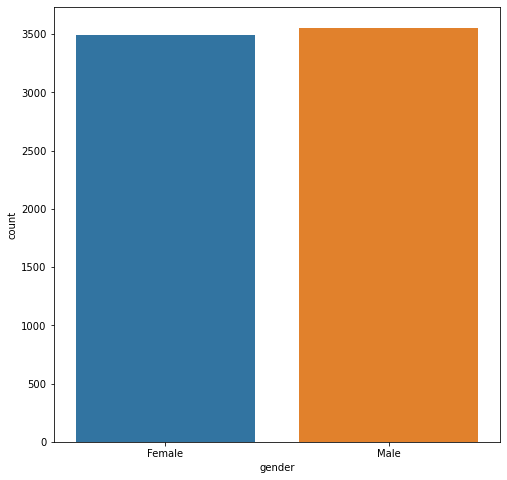

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(df['gender'])
print ('Value Count :- ',df['gender'].value_counts())

### Count of male And female is almost equal but male is bit more value count

Value Count :-  0    5901
1    1142
Name: SeniorCitizen, dtype: int64


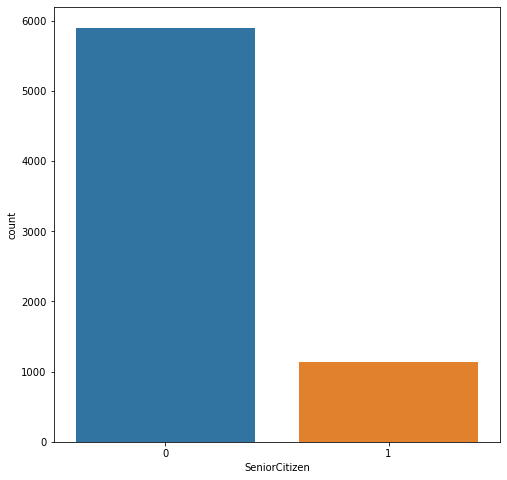

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(df['SeniorCitizen'])
print ('Value Count :- ',df['SeniorCitizen'].value_counts())

### So we can see that the Number of Senior citizen are Less in counts

Value Count :-  0    5901
1    1142
Name: SeniorCitizen, dtype: int64


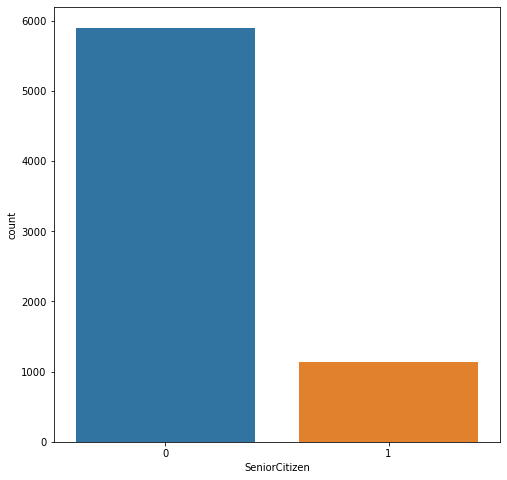

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(df['SeniorCitizen'])
print ('Value Count :- ',df['SeniorCitizen'].value_counts())

Value Count :-  No     3641
Yes    3402
Name: Partner, dtype: int64


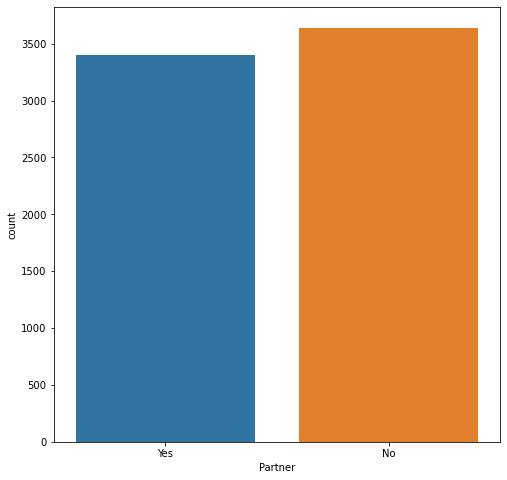

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(df['Partner'])
print ('Value Count :- ',df['Partner'].value_counts())

## The count of No in Patner is more as compared to yes

Value Count :-  No     3641
Yes    3402
Name: Partner, dtype: int64


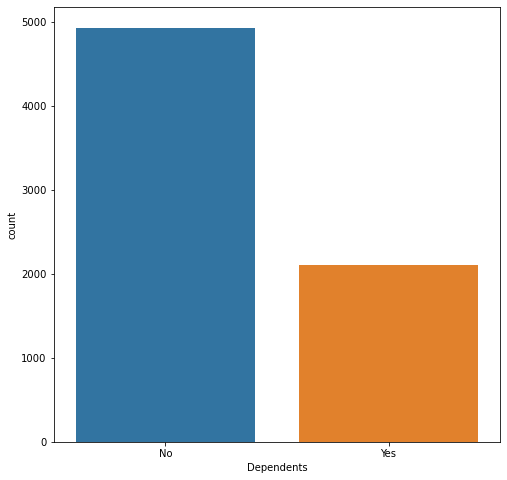

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(df['Dependents'])
print ('Value Count :- ',df['Partner'].value_counts())

### The Count of Dependents is less in the dataset

Value Count :-  1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


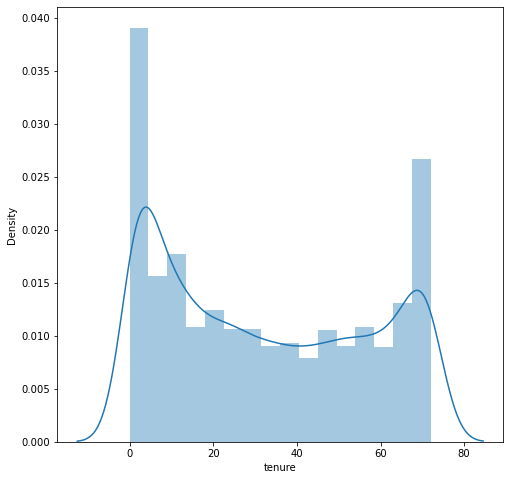

In [29]:
plt.figure(figsize=(8,8))
sns.distplot(df['tenure'])
print ('Value Count :- ',df['tenure'].value_counts())

In [30]:
df['tenure'].mean()

32.37114865824223

In [31]:
df['tenure'].max()

72

### Average Tenure seems to be like 32 Years

Value Count :-  Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


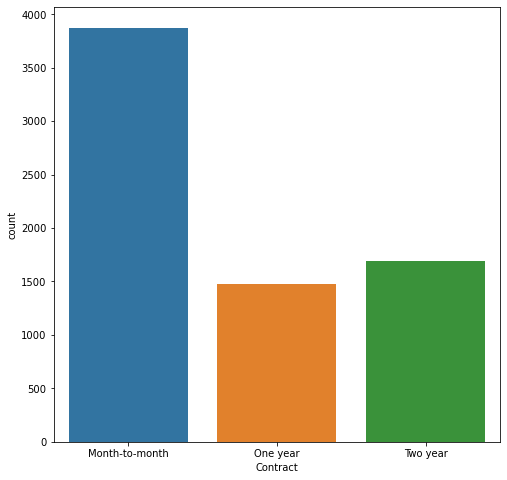

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(df['Contract'])
print ('Value Count :- ',df['Contract'].value_counts())

### We can see that most people opt for month to month contract as it is easy and less burdensome to Pay and the least is one year contract

Value Count :-  Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


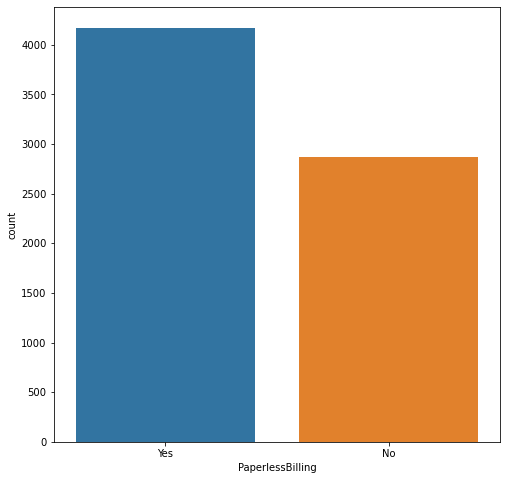

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(df['PaperlessBilling'])
print ('Value Count :- ',df['PaperlessBilling'].value_counts())

### Yes maximum people opt for paperless billing ,we ccan that as it dont consume much time

Value Count :-  Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


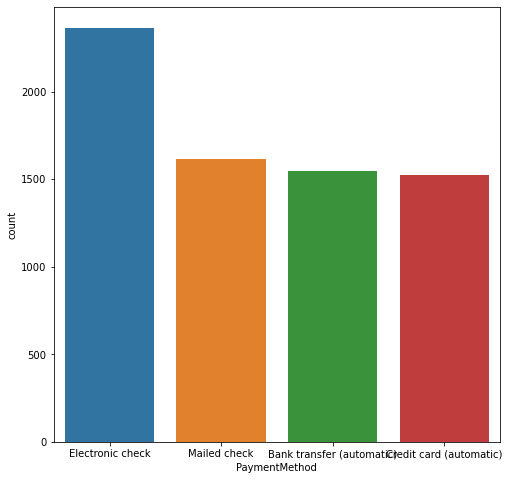

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(df['PaymentMethod'])
print ('Value Count :- ',df['PaymentMethod'].value_counts())

### We can see that maximum people opt for Electronic Checks and the least is done by credit card automatic

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


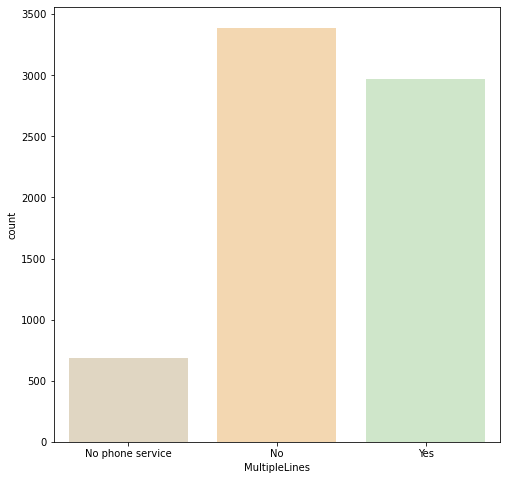

In [35]:
plt.figure(figsize=(8,8))
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"],palette="Pastel1_r")
plt.show()

### The customers who have phone services from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


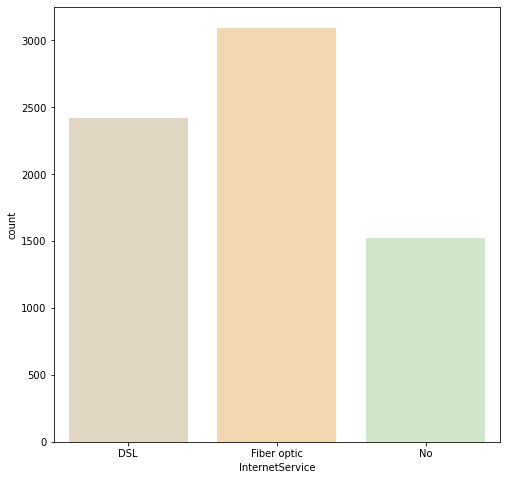

In [36]:
plt.figure(figsize=(8,8))
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette="Pastel1_r")
plt.show()

### We can see that most of the people opt for Fiber optics followed by DSL and there are very less people who dont use Internet Service

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


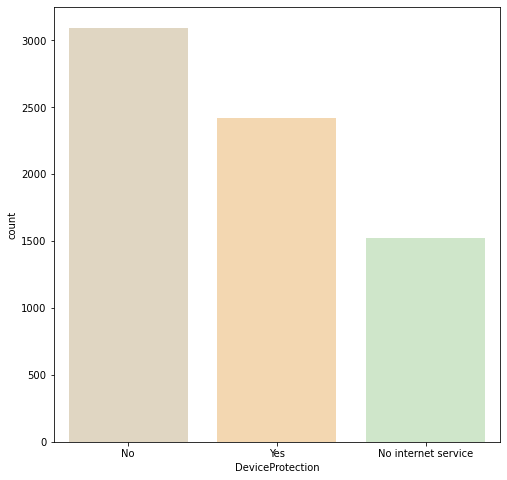

In [37]:
plt.figure(figsize=(8,8))
print(df["DeviceProtection"].value_counts())
sns.countplot(df["DeviceProtection"],palette="Pastel1_r")
plt.show()

### From the count plot we can notice that the customers without any device protection have high counts as compared to the customers who have some kind of device protection. And the customers who do not have internet access they do not need any device protection.

Value Count :-  20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


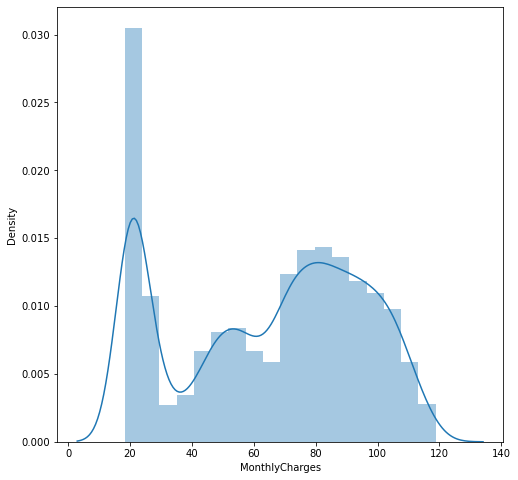

In [38]:
plt.figure(figsize=(8,8))
sns.distplot(df['MonthlyCharges'])
print ('Value Count :- ',df['MonthlyCharges'].value_counts())

In [39]:
df['MonthlyCharges'].mean()

64.76169246059922

### Our Average Monthly charge is Around `$65` and the maximum have even gone till $120 

In [40]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [41]:
# total charges is in Object type so lets covert it into Flaot
df['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Average of totalCharge :-  2281.9169281556187


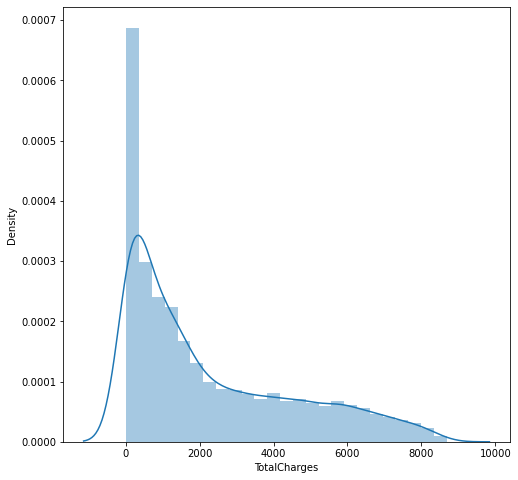

In [42]:
plt.figure(figsize=(8,8))
sns.distplot(df['TotalCharges'])
print ('Average of totalCharge :- ',df['TotalCharges'].mean())

### We can see that the average of Total charge is $2282

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:green'> B. Bivariate Analysis <h2>

In [43]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

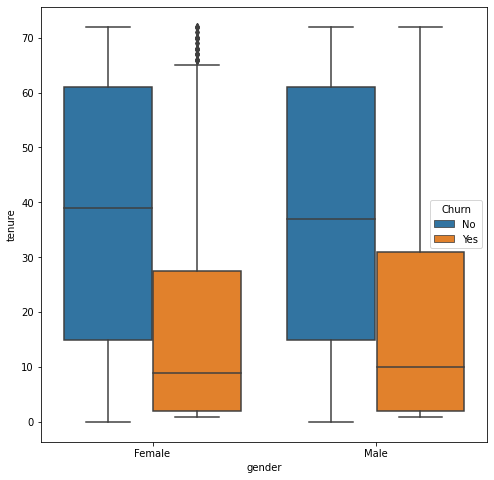

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot( x = "gender",y = "tenure", data = df,hue="Churn")
plt.show()

### Here we can see that males are more prone to churns  as compared to womens in the Tenure of 60 years in both male and female

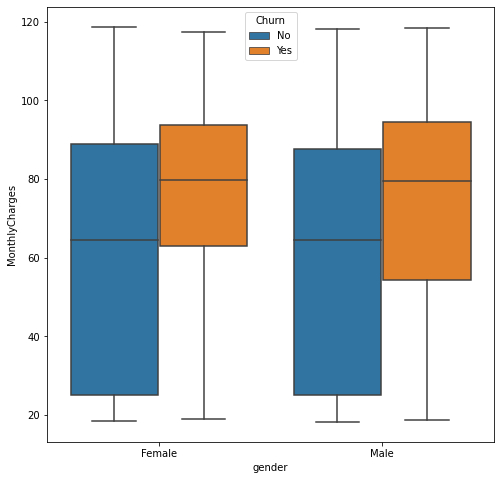

In [45]:
plt.figure(figsize=(8,8))
sns.boxplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn")
plt.show()

### Most both male and female customers with monthly charges above 65 have high chances of getting churned..Male chances are little bit more

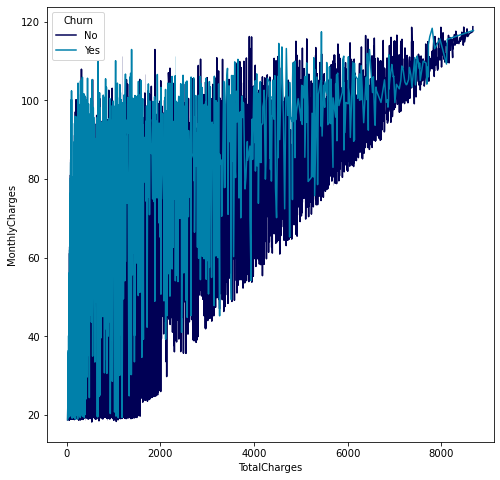

In [46]:
plt.figure(figsize=(8,8))
sns.lineplot( y = "MonthlyCharges",x = "TotalCharges", data = df,hue="Churn",palette="ocean")
plt.show()

### We can see that the MonthlyCharges and Total charges have a Linear Relaltionship . . As the their is increase in Monthly Charges  their is a significant increses in the total charges too

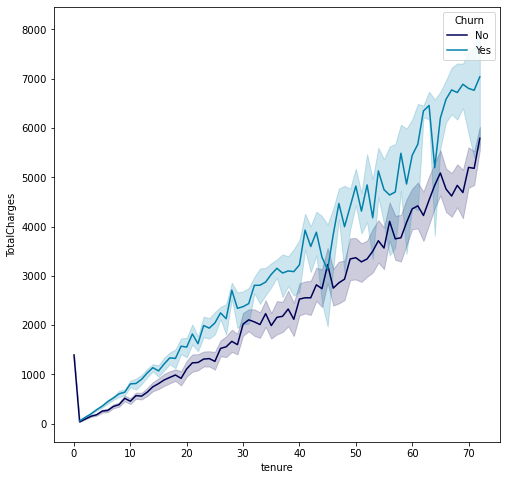

In [47]:
plt.figure(figsize=(8,8))
sns.lineplot( x = "tenure",y = "TotalCharges", data = df,hue="Churn",palette="ocean")
plt.show()

### We can see that the Tenure and Total charges have a Linear Relaltionship . . As the tenure increases Their is increses in the total charges too

<Figure size 576x576 with 0 Axes>

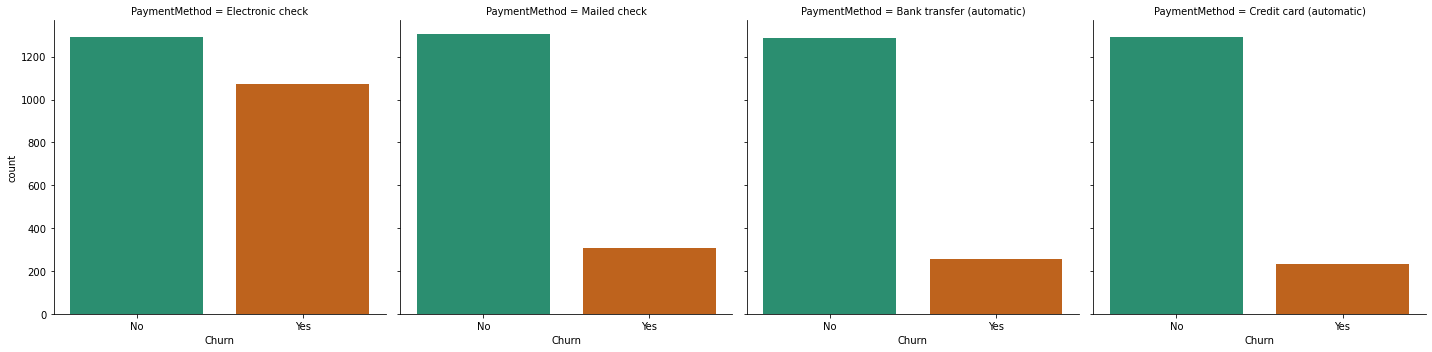

In [48]:
plt.figure(figsize=(8,8))
sns.catplot(x='Churn',col='PaymentMethod',data=df,palette="Dark2",kind="count")
plt.show()

## The One who is paying through Electronic check have the highest churn  and the who paying through credit card have the lowest churn in all

In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Figure size 576x576 with 0 Axes>

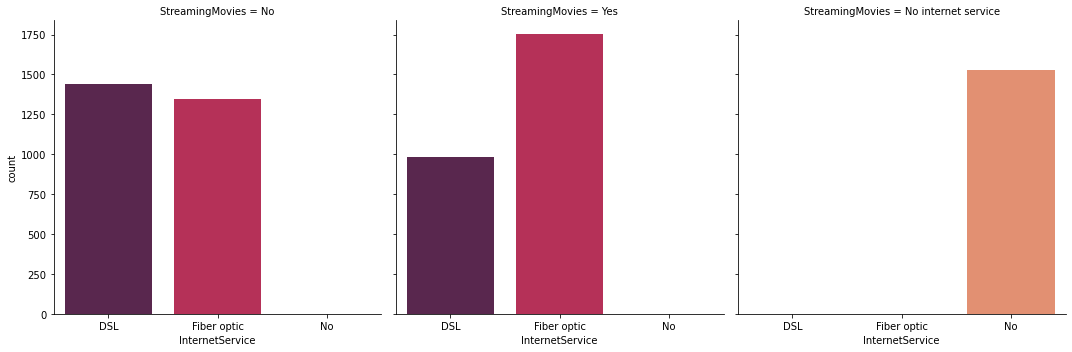

In [50]:
plt.figure(figsize=(8,8))
sns.catplot(x='InternetService',col='StreamingMovies',data=df,palette="rocket",kind="count")
plt.show()

### The Open who is using Fiber optics are streming movies the most followed by DSL but WE can see that the one who dont have internet connection cannot stream movies at all 

<Figure size 576x576 with 0 Axes>

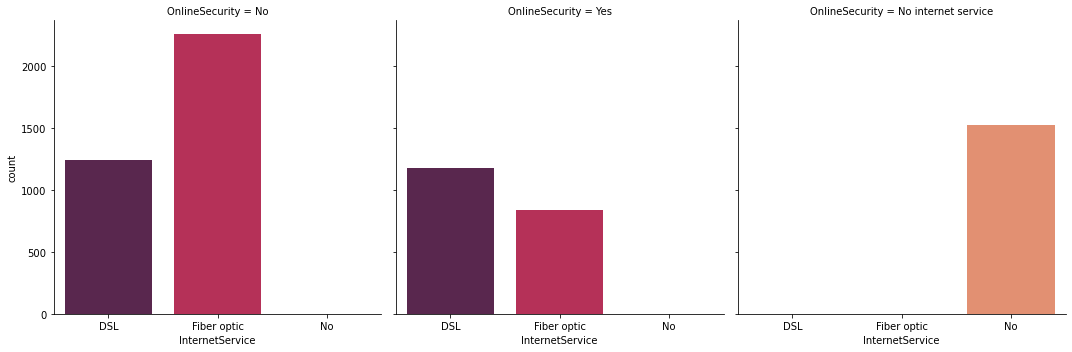

In [51]:
plt.figure(figsize=(8,8))
sns.catplot(x='InternetService',col='OnlineSecurity',data=df,palette="rocket",kind="count")
plt.show()

## Online security is taken maximum by the people who opt DSL internet service followed by Fiber optics and  The one dont use internet Service ,dont have online security too

<Figure size 576x576 with 0 Axes>

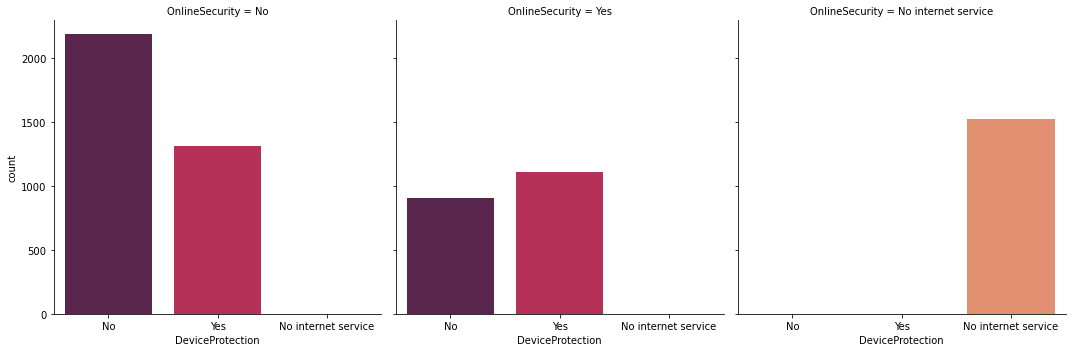

In [52]:
plt.figure(figsize=(8,8))
sns.catplot(x='DeviceProtection',col='OnlineSecurity',data=df,palette="rocket",kind="count")
plt.show()

### We get to know that it is on the will of customer to opt for either Online Security and Device protection or both at a same time.. Here customer who have not taken online security but have taken Device protection above 1250 counts and the one who have opted for online security and have taken Device protection too is little less than the one who have not taken Online Security

<Figure size 576x576 with 0 Axes>

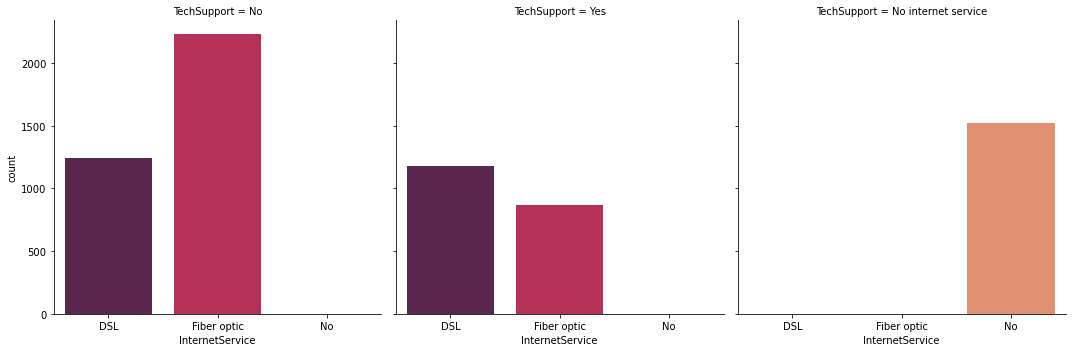

In [53]:
plt.figure(figsize=(8,8))
sns.catplot(x='InternetService',col='TechSupport',data=df,palette="rocket",kind="count")
plt.show()

### We can see that the one who use DSL internet service are opting more for tech Support followed by fiber optics ,Here we can see that the users of fiber optics are more but they are not taking tech support much

<Figure size 576x576 with 0 Axes>

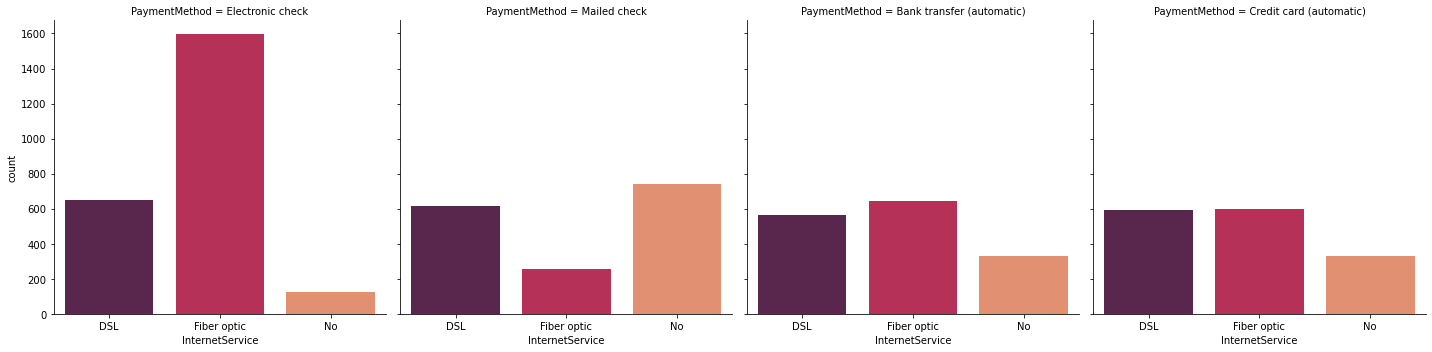

In [54]:
plt.figure(figsize=(8,8))
sns.catplot(x='InternetService',col='PaymentMethod',data=df,palette="rocket",kind="count")
plt.show()

### Electronic check payment method is widely used and credit card payment method is used least

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> C. Multi-variate Analysis <h2>

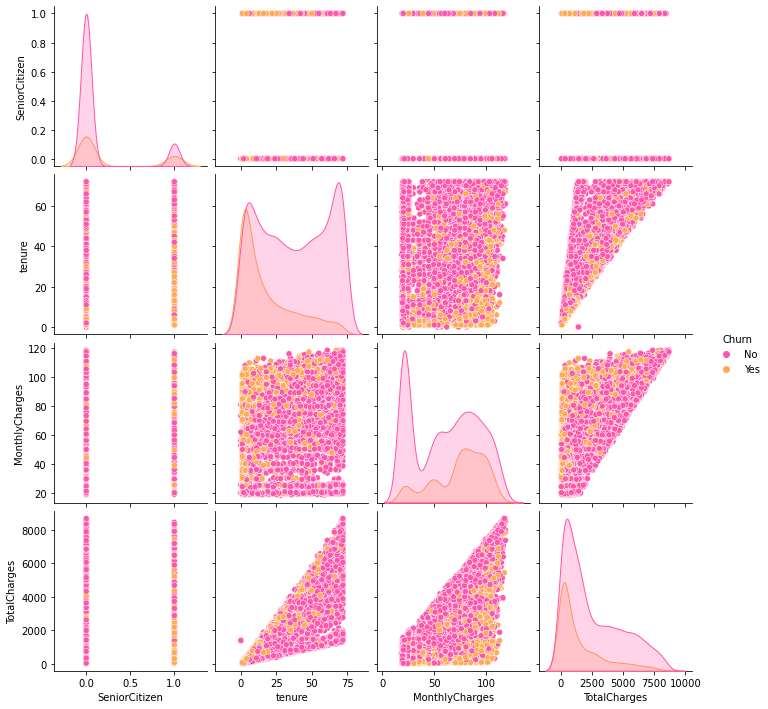

In [55]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Churn",palette="spring")

## This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Churn". Here we can observe the relation between the features and label

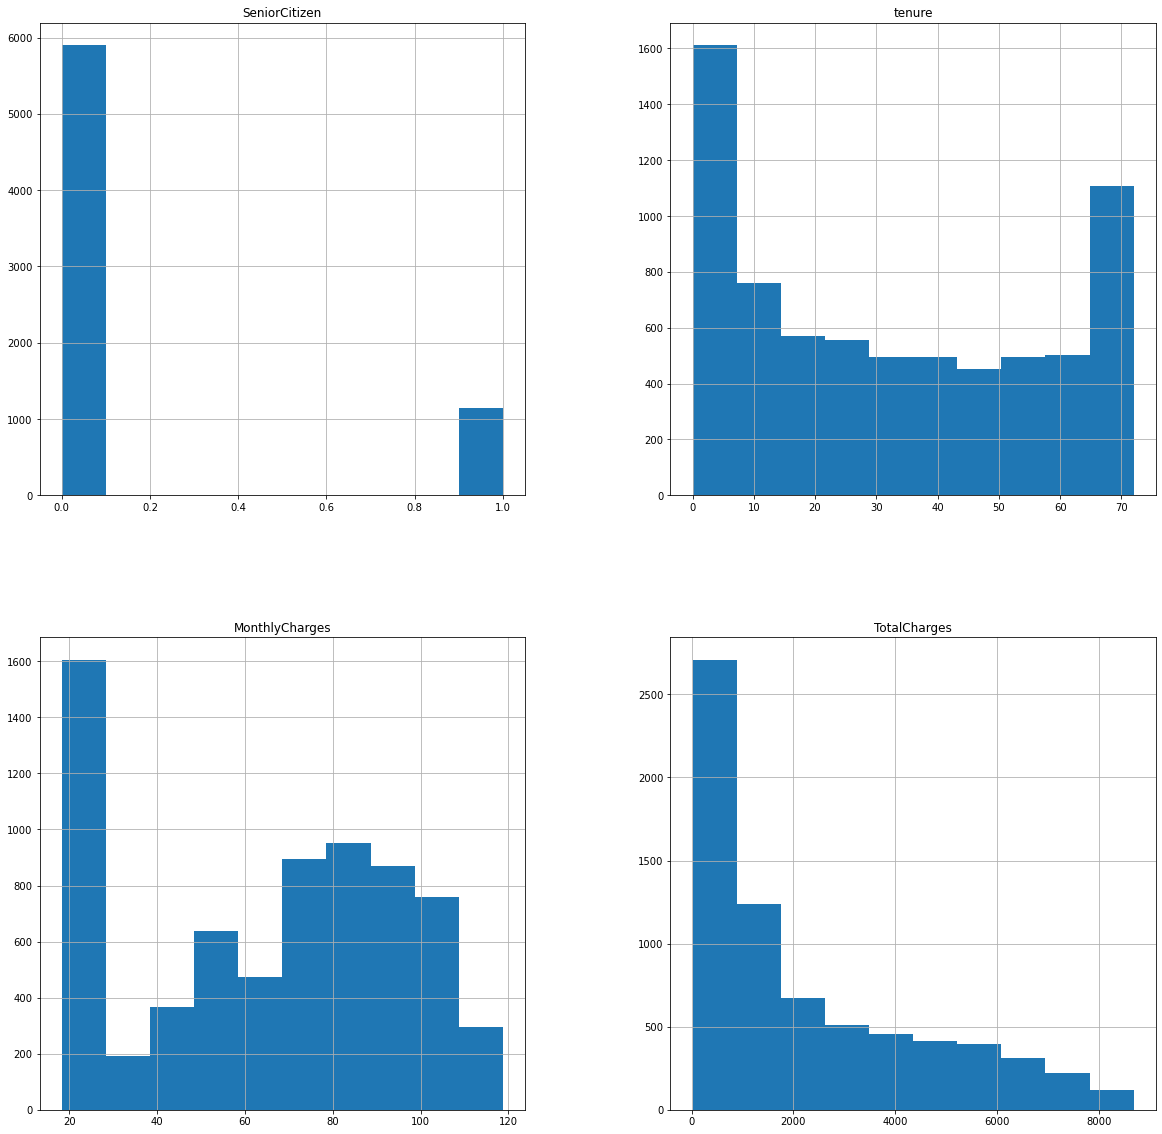

In [56]:
df.hist(bins=10, figsize=(20,20))
plt.show()

## We can see skewness is present in the dataset. We are gonna a correct it later

SeniorCitizen        AxesSubplot(0.125,0.787927;0.227941x0.0920732)
tenure            AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
MonthlyCharges    AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
TotalCharges         AxesSubplot(0.125,0.677439;0.227941x0.0920732)
dtype: object

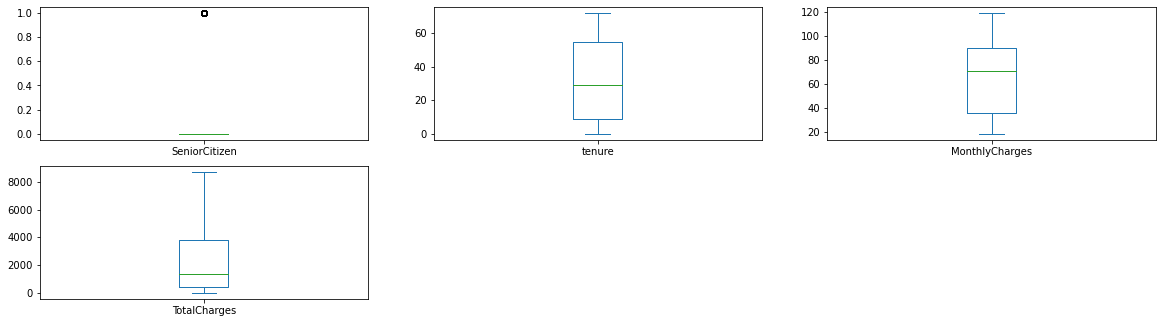

In [57]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

# The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.

### Lets Convert all catagorical columns to Numerical by Encoding Tech

<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> CORRELATION <h2>

In [58]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Lets Convert all catagorical columns to Numerical by Encoding Tech

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [60]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375063,-0.195525


## here we can see correlation of all the columns to target variable

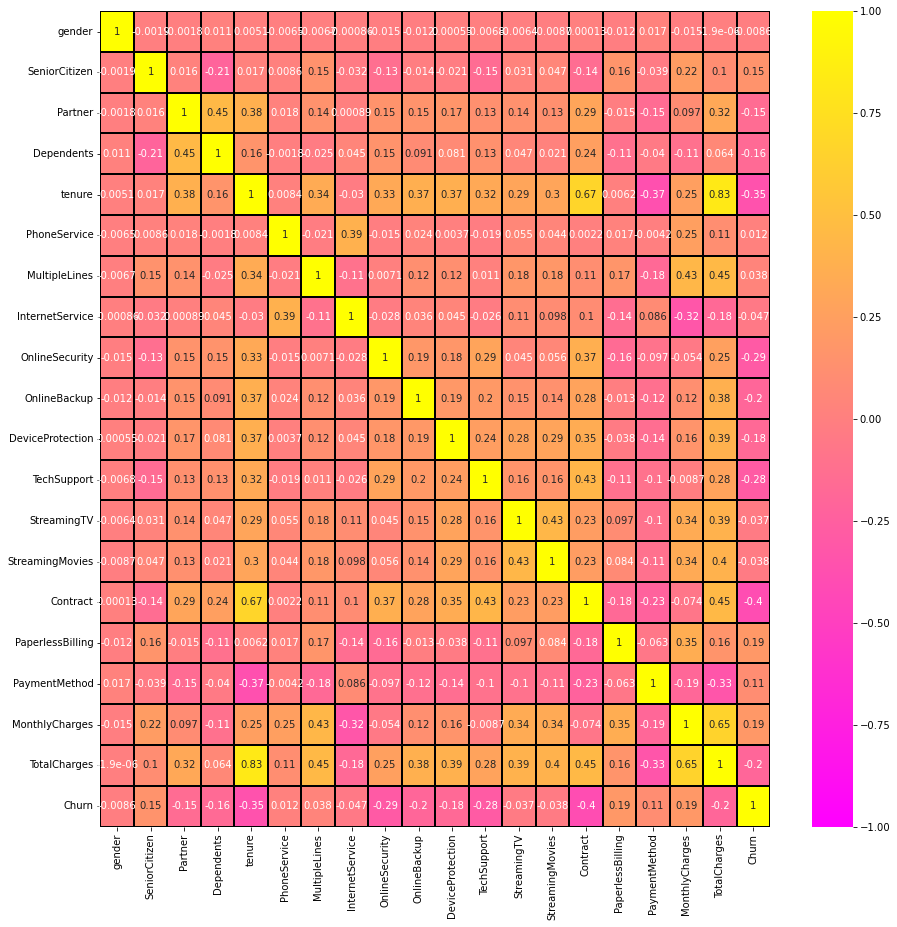

In [61]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="spring")
plt.yticks(rotation=0);

## This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

In [62]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199037
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

## We can see that some columns are Negatively correlated and some are positively correlated ..Max positively correlated column is :- Monthly Charges and Max Negetively column is :-  Contract

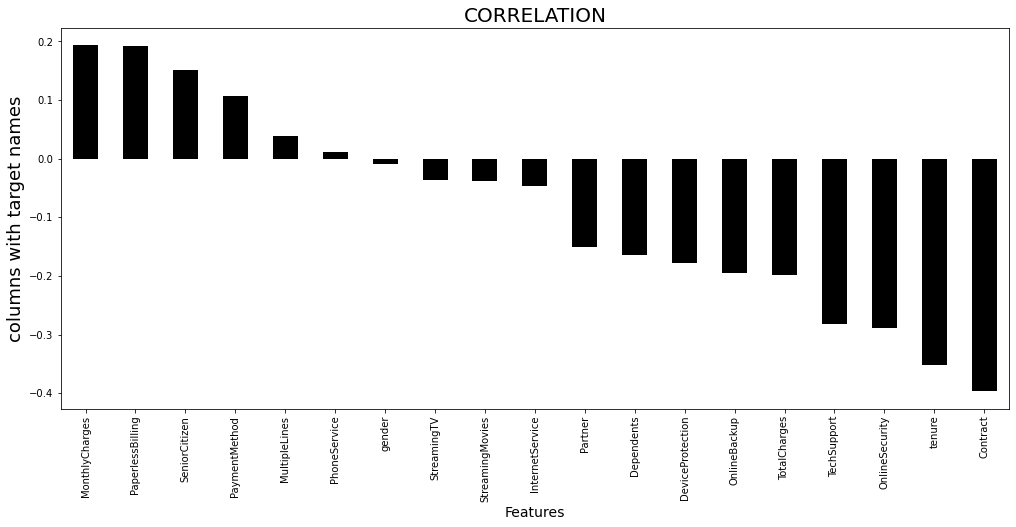

In [63]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

## Here we can see the least correlated columns are-> Gender and PhoneService and the max postive and Negative correlated columns as Monthly Charges and Contract.

<h2 style='text-align:center;font-size:40px;background-color:green;border:40px;color:white'> DESCRIPTIVE STATISTICS <h2>

In [64]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


#### We can see all columns having count 7043. Looks like it doesn't contain missing values.

<AxesSubplot:>

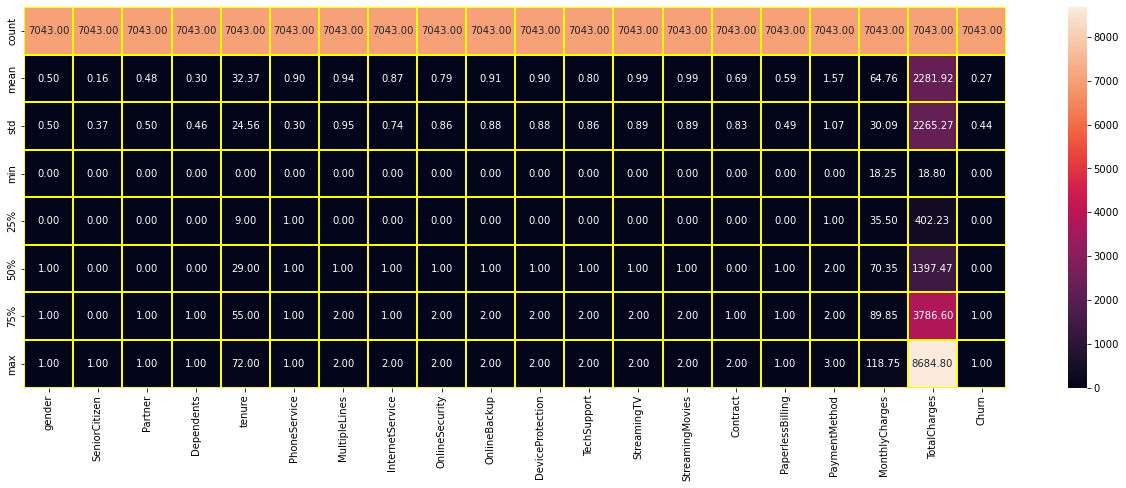

In [65]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="yellow",fmt="0.2f")

In [66]:
df.shape

(7043, 20)

## Outcome of describe() of dataset :-

**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

**Total number rows and column in dataset:-**

**`Rows :- 7043`**

**`columns :- 20`**

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:black'> Lets Check Skewness <h2>


In [67]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

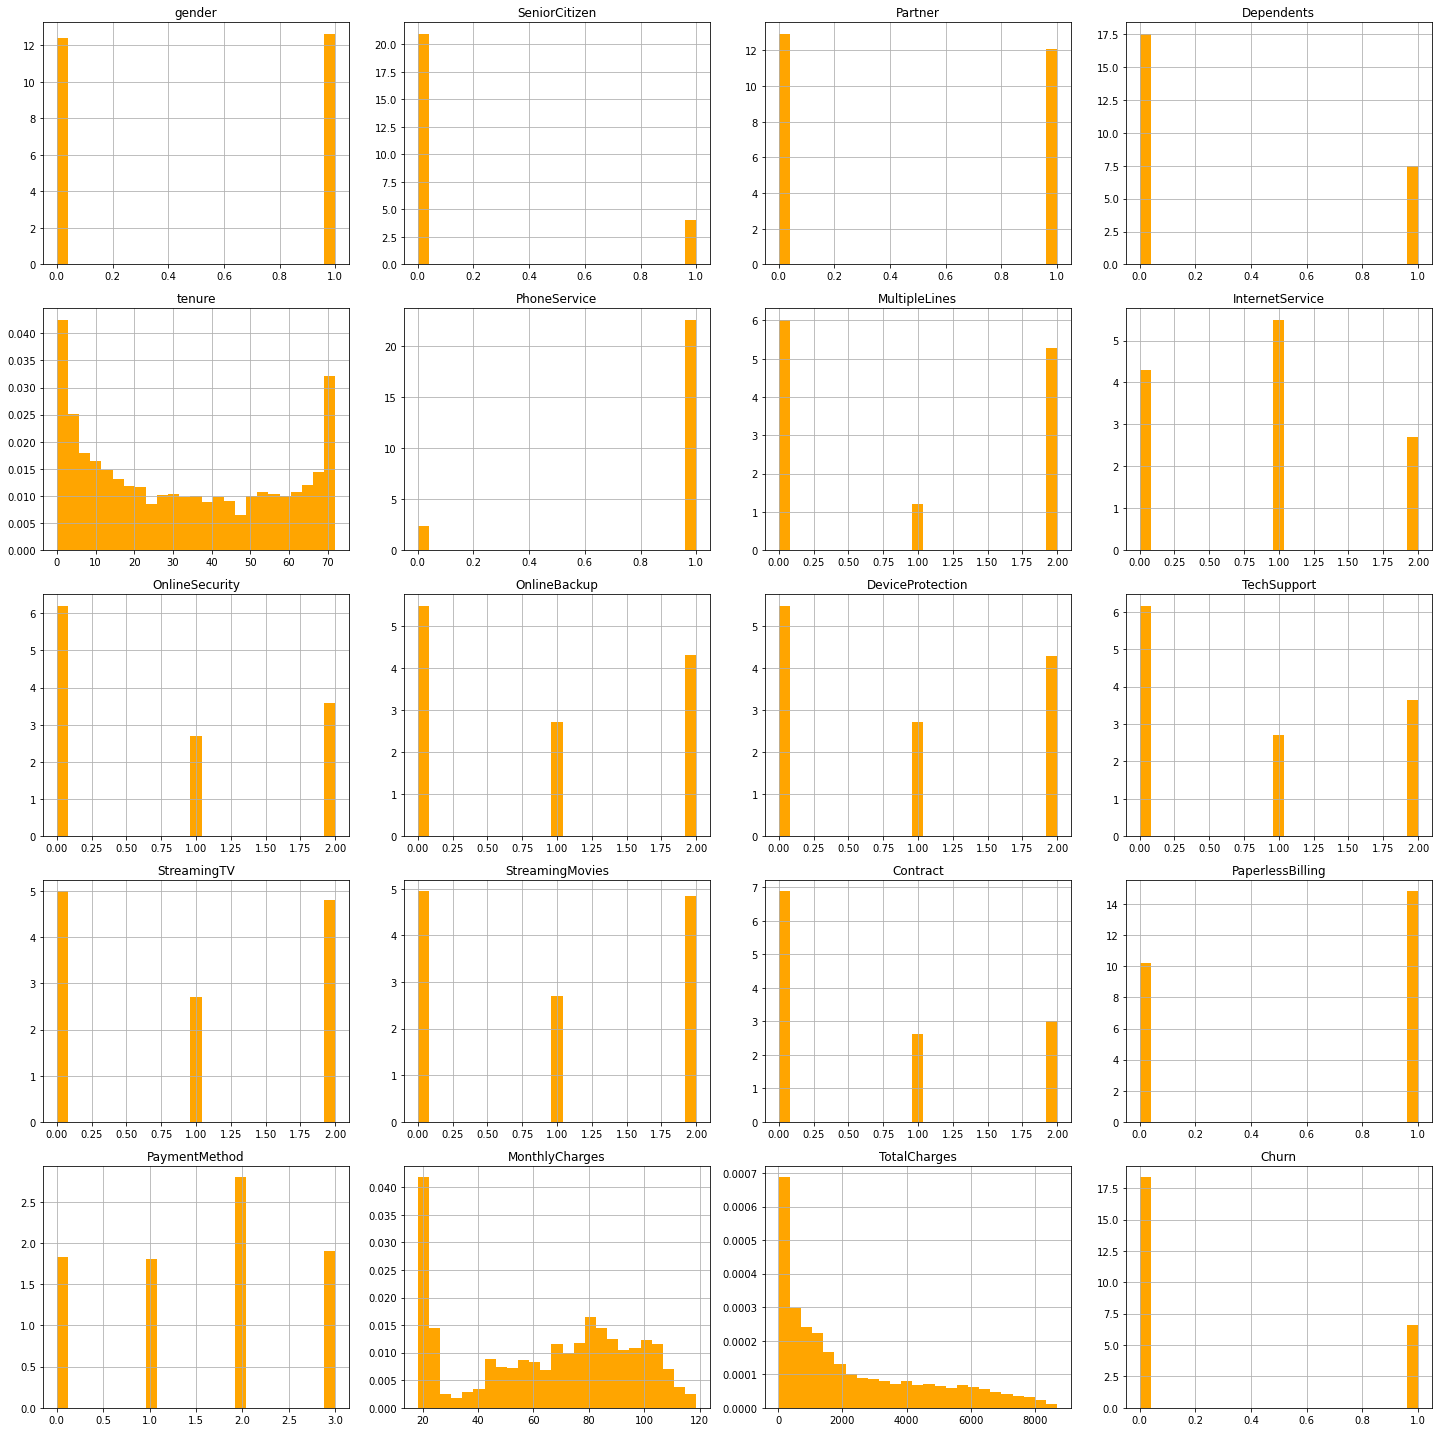

In [68]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='orange',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

## Only Senior Citizen and Total Charges have Skewness and it is needed to be removed ,Rest all columns which are showing skewness are catagorical columns and in this we are not required to remove skewness.. Even Senior citizen columns contain data which is of catagorical type


<h2 style='text-align:center;font-size:40px;background-color:purple;border:30px;color:white'> *Now Lets Remove Skewness Now* <h2>


## Removing Skewness with cube root

In [69]:
df['TotalCharges']=np.cbrt(df['TotalCharges'])
df['TotalCharges'].skew()

0.012996097169276428

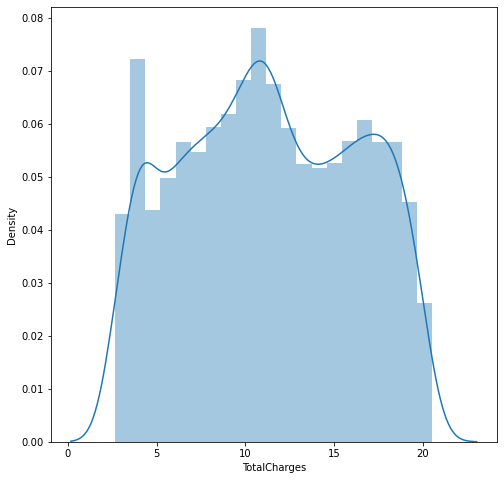

In [70]:
plt.figure(figsize=(8,8))
sns.distplot(df['TotalCharges'])
plt.show()

## Now it is been Normalized

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> Now Lets Split the dataset into dependent and independent variable <h2>

In [71]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704,1


In [72]:
x=df.loc [:,df.columns != 'Churn']
# Independent Variable

In [73]:
y=df.loc[:,'Churn']
#Dependent Variable

In [74]:
x.shape

(7043, 19)

In [75]:
y.shape

(7043,)

<h2 style='text-align:center;font-size:40px;background-color:Black;border:40px;color:green'> Now Lets Scale The Dataset <h2>

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.685885
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205869
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346302
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183960
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.250087
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.654513
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.884843
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942107


# WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [80]:
vif_cal()

    VIF FACTOR          FEATURES
0     1.001694            gender
1     1.149694     SeniorCitizen
2     1.462892           Partner
3     1.383773        Dependents
4    12.767881            tenure
5     1.622418      PhoneService
6     1.398163     MultipleLines
7     1.871514   InternetService
8     1.256319    OnlineSecurity
9     1.192573      OnlineBackup
10    1.288620  DeviceProtection
11    1.312948       TechSupport
12    1.445301       StreamingTV
13    1.443981   StreamingMovies
14    2.527197          Contract
15    1.203397  PaperlessBilling
16    1.180775     PaymentMethod
17    5.468368    MonthlyCharges
18   17.253682      TotalCharges


## By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [81]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [82]:
# Now Lets check VIF again and see multicollinearity

def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [83]:
vif_cal()

    VIF FACTOR          FEATURES
0     1.001684            gender
1     1.149639     SeniorCitizen
2     1.460856           Partner
3     1.382106        Dependents
4     2.754468            tenure
5     1.622282      PhoneService
6     1.391652     MultipleLines
7     1.825876   InternetService
8     1.247696    OnlineSecurity
9     1.185932      OnlineBackup
10    1.280152  DeviceProtection
11    1.303573       TechSupport
12    1.443671       StreamingTV
13    1.442276   StreamingMovies
14    2.459201          Contract
15    1.202918  PaperlessBilling
16    1.180664     PaymentMethod
17    2.733024    MonthlyCharges


## Now Multicollinearity from all the columns have been removed

# Balancing the dataset over here,otherwise it will be a baised dataset

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [86]:
x.shape

(10348, 18)

In [87]:
y.shape

(10348,)

<AxesSubplot:xlabel='Churn', ylabel='count'>

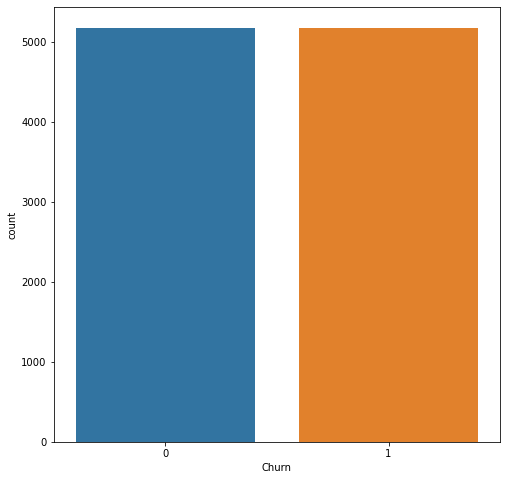

In [88]:
plt.figure(figsize=(8,8))
sns.countplot(y)

# Now my DATASET is Balanced

# Lets do PCA - Principal Component Analysis``````

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca=PCA(n_components=10)

In [91]:
x=pca.fit_transform(x)
x

array([[-1.86021834,  0.87752666,  2.96838962, ..., -2.42087377,
        -0.21344461, -0.33479131],
       [-0.76427934,  1.89417901,  0.21842978, ...,  1.31354551,
         0.56922544, -0.02581817],
       [-1.94850881,  1.04517553,  0.42377123, ..., -1.3817444 ,
         1.55082743,  0.76256506],
       ...,
       [-2.0803759 , -0.65021869, -0.98962185, ...,  0.13079457,
         0.38729748, -0.21663568],
       [-2.94236035,  1.38418553, -0.00844573, ...,  0.21736946,
        -0.04644235,  0.4366961 ],
       [-1.78750359,  0.73403513,  0.12760036, ...,  0.68414832,
         0.86204446,  0.45341927]])

## Now Our dataset is Reduced to n_component = 10

# Model Training and Testing

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

In [93]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  11  The model performs very well
At random_state:- 11
Training accuaracy_score is :- 76.6
Testing accuracy_score is:- 76.6 


At random state  14  The model performs very well
At random_state:- 14
Training accuaracy_score is :- 76.6
Testing accuracy_score is:- 76.6 


At random state  26  The model performs very well
At random_state:- 26
Training accuaracy_score is :- 76.6
Testing accuracy_score is:- 76.6 


At random state  37  The model performs very well
At random_state:- 37
Training accuaracy_score is :- 76.6
Testing accuracy_score is:- 76.6 


At random state  70  The model performs very well
At random_state:- 70
Training accuaracy_score is :- 76.7
Testing accuracy_score is:- 76.7 


At random state  75  The model performs very well
At random_state:- 75
Training accuaracy_score is :- 76.5
Testing accuracy_score is:- 76.5 


At random state  95  The model performs very well
At random_state:- 95
Training accuaracy_score is :- 76.6
Testing accuracy_score is:- 76.6 



In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

In [95]:
lr.fit(x_train,y_train)

LogisticRegression()

In [96]:
pred_train=lr.predict(x_train)

In [97]:
pred_test=lr.predict(x_test)

In [98]:
accuracy_score(y_test,pred_test)

0.7681159420289855

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1024
           1       0.75      0.82      0.78      1046

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



# CROSS VALIDATION FOR LOGISTICS REGRESSION

In [101]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [102]:
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 2
Cross validation score is :- 76.50753768844221
Accuracy_score is :- 76.81159420289855


At cv:- 3
Cross validation score is :- 76.55597435649625
Accuracy_score is :- 76.81159420289855


At cv:- 4
Cross validation score is :- 76.52686509470429
Accuracy_score is :- 76.81159420289855


At cv:- 5
Cross validation score is :- 76.52697398682646
Accuracy_score is :- 76.81159420289855


At cv:- 6
Cross validation score is :- 76.52693993297243
Accuracy_score is :- 76.81159420289855


At cv:- 7
Cross validation score is :- 76.57536067480979
Accuracy_score is :- 76.81159420289855


At cv:- 8
Cross validation score is :- 76.53662988556859
Accuracy_score is :- 76.81159420289855


At cv:- 9
Cross validation score is :- 76.50750284851772
Accuracy_score is :- 76.81159420289855




In [103]:
# I will take CV as 9 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=9).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7650750284851772 
The accuracy_score is: 0.7681159420289855


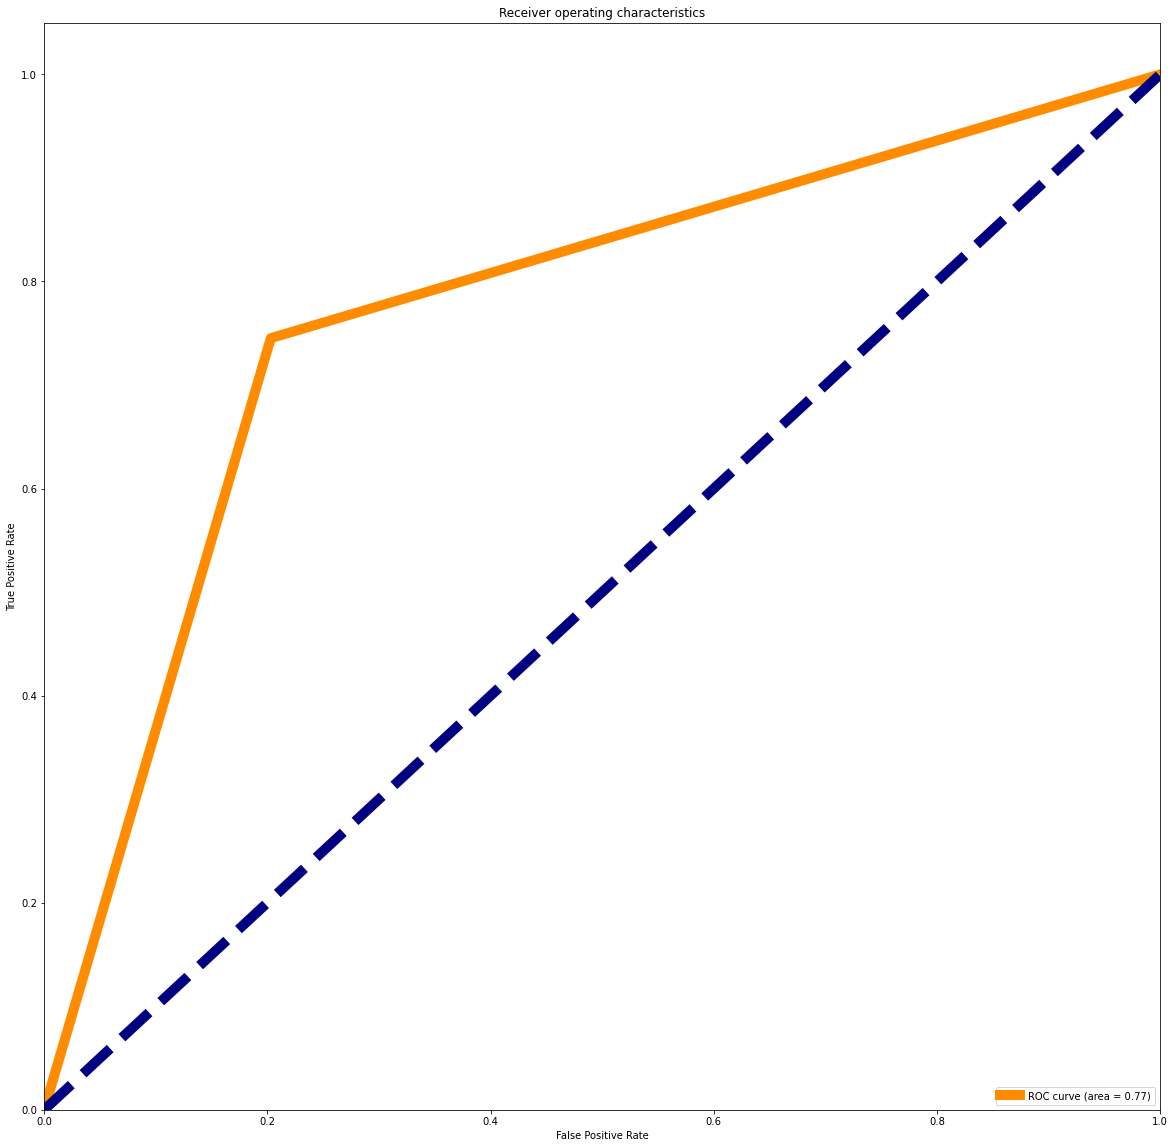

In [104]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 77% of area is inside AUC ROC curve Which is good

# DECISION TREE CLASSIFIER

In [105]:
# Checking Accuracy for Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())

0.7714975845410628
[[760 264]
 [209 837]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1024
           1       0.76      0.80      0.78      1046

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070

CV  :- 0.7558018880039601


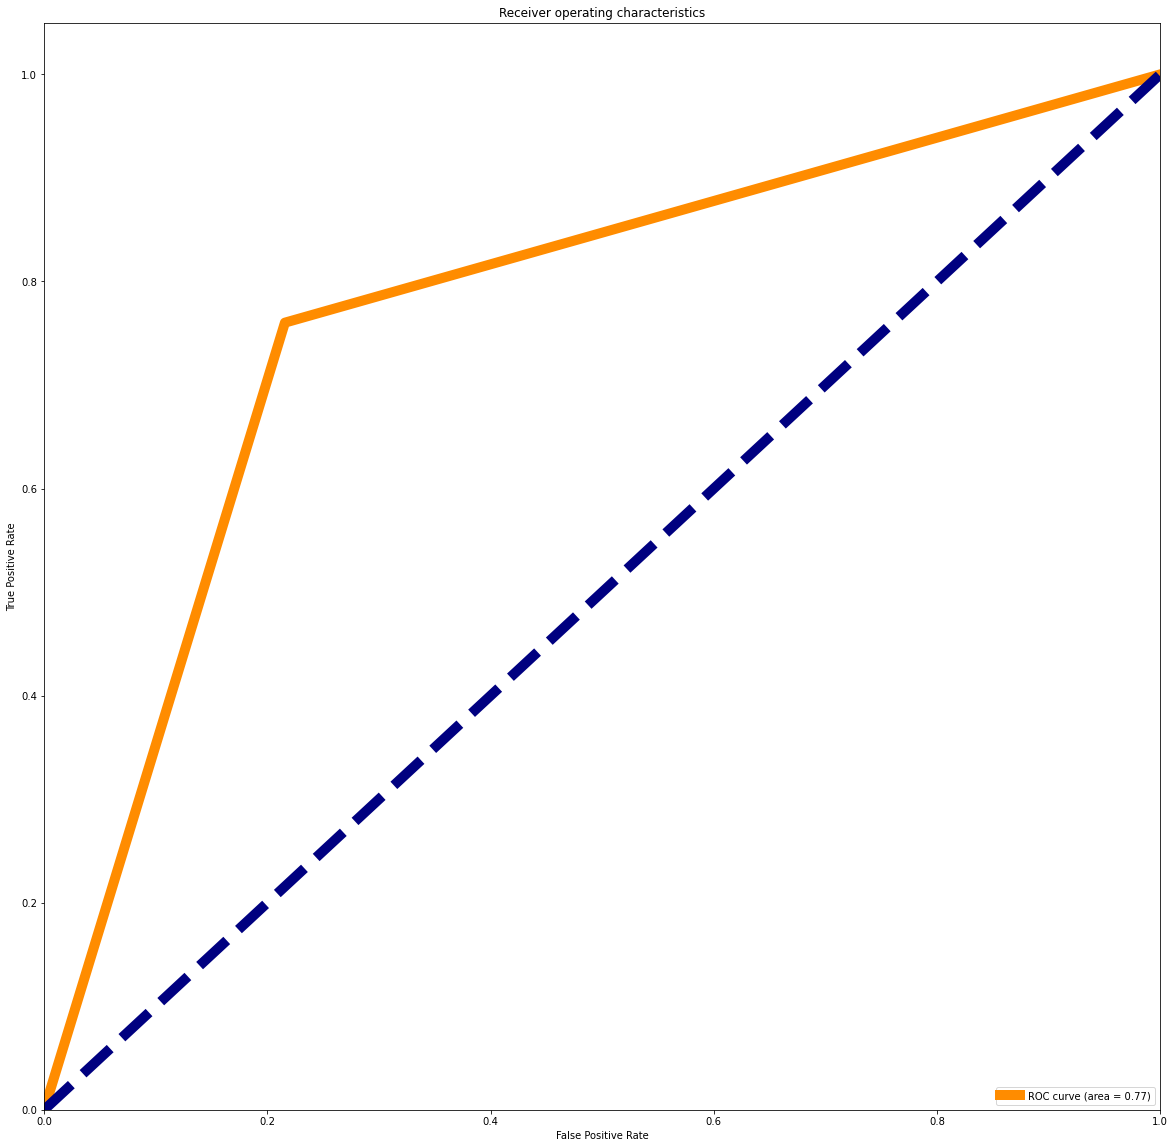

In [106]:
fpr,tpr,threshold=roc_curve(preddt,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 76% of area is inside AUC ROC curve Which is good

# KNeighbors Classifier

In [107]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())


0.7758454106280194
[[692 332]
 [132 914]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      1024
           1       0.73      0.87      0.80      1046

    accuracy                           0.78      2070
   macro avg       0.79      0.77      0.77      2070
weighted avg       0.79      0.78      0.77      2070

CV  :- 0.7859512051610733


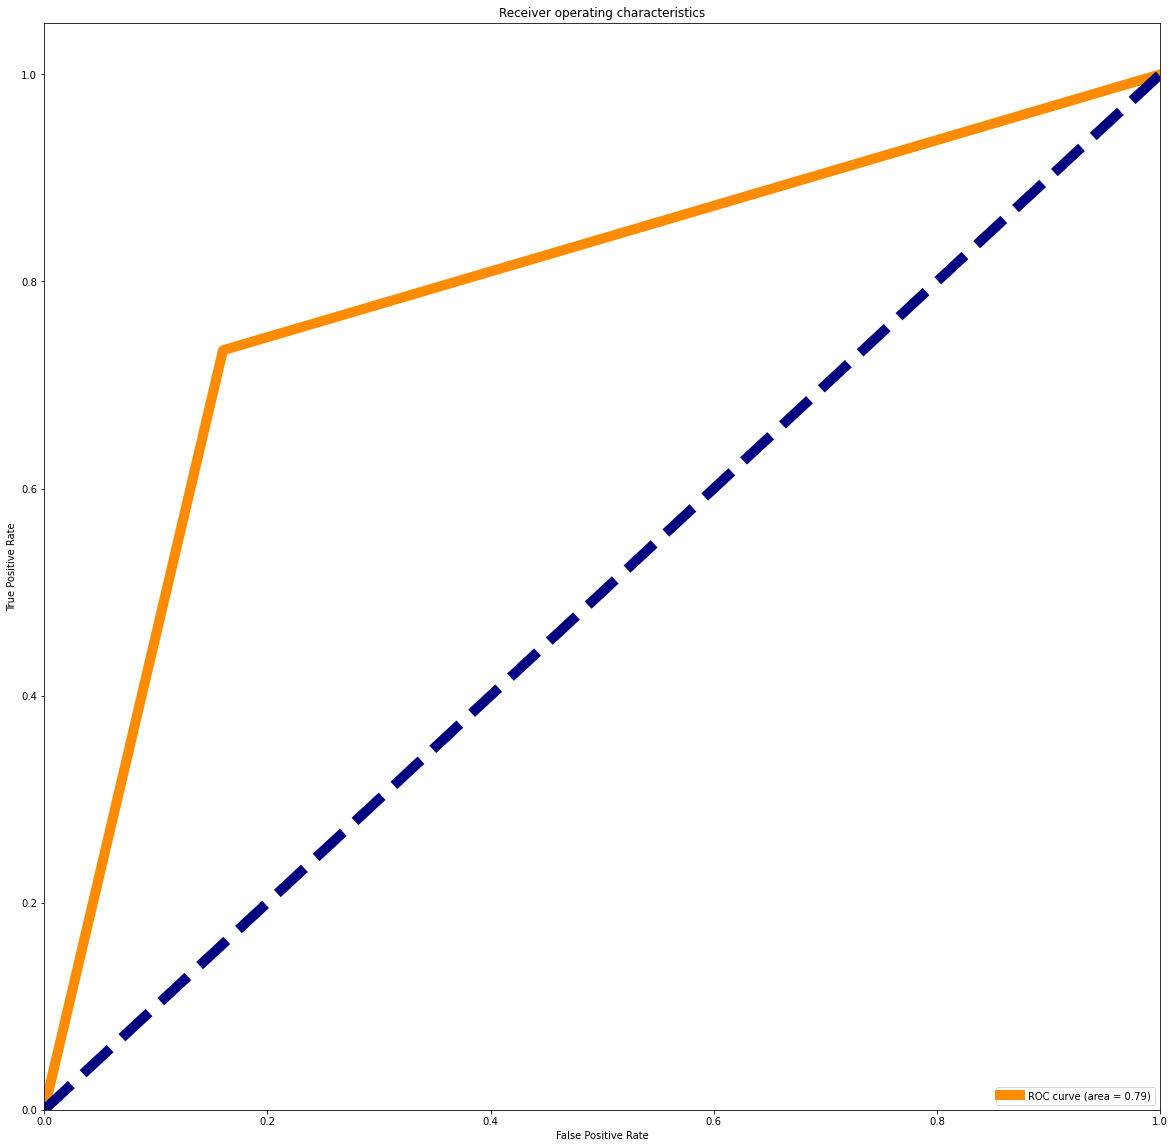

In [108]:
fpr,tpr,threshold=roc_curve(predknn,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 79% of area is inside AUC ROC curve Which is good

# ENSEMBLE TECHNIQUE

In [109]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())

0.8173913043478261
[[798 226]
 [152 894]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1024
           1       0.80      0.85      0.83      1046

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

CV  :- 0.8246083547560842


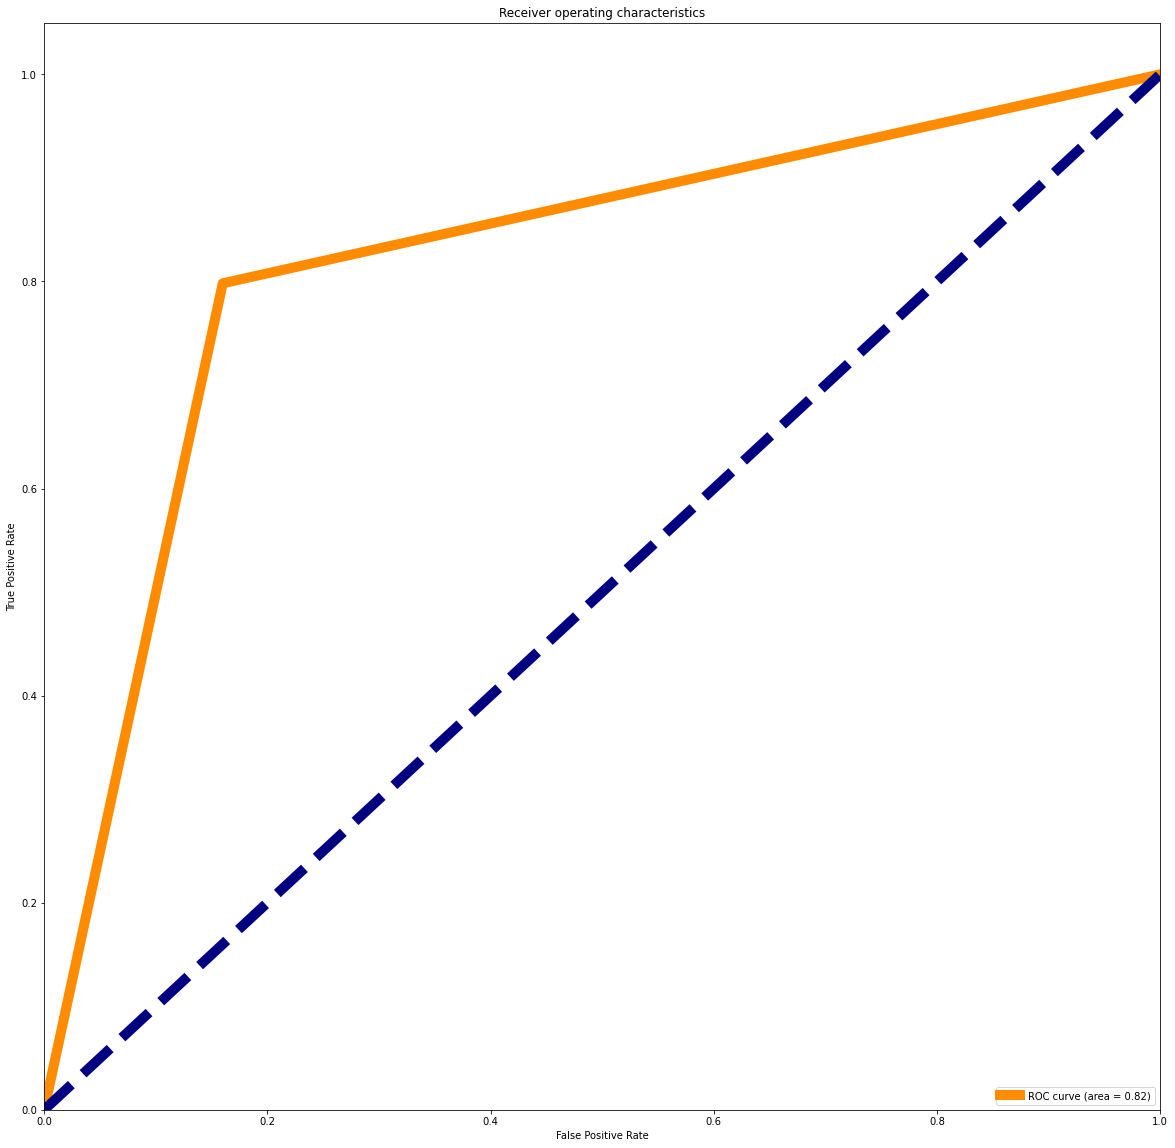

In [110]:
fpr,tpr,threshold=roc_curve(predrf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### We can see that 82% of area is inside AUC ROC curve Which is good

In [111]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())


0.7710144927536232
[[713 311]
 [163 883]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1024
           1       0.74      0.84      0.79      1046

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070

CV  :- 0.7732916786330535


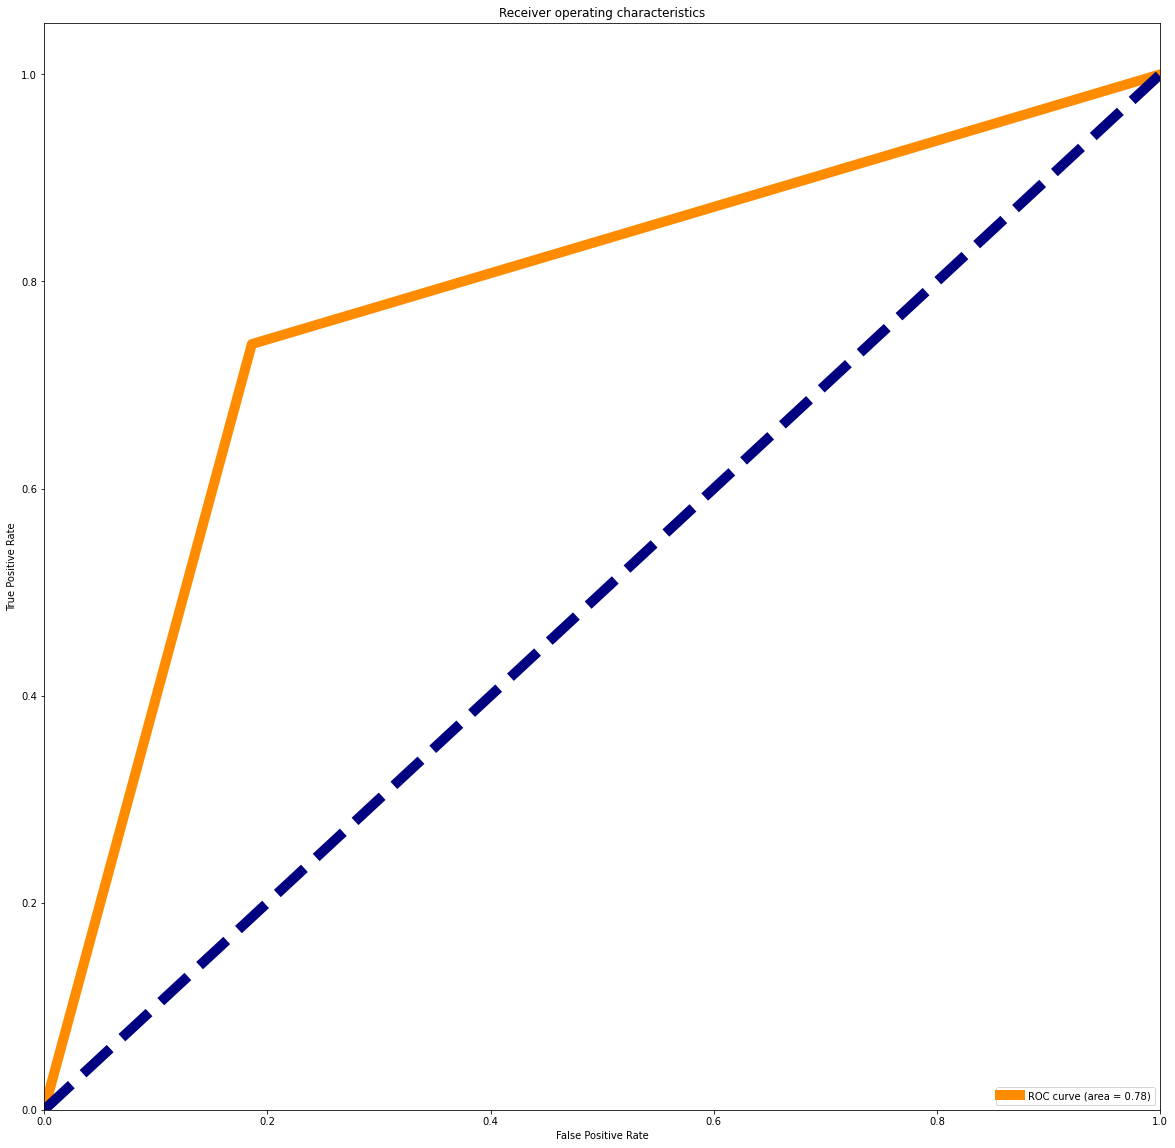

In [112]:
fpr,tpr,threshold=roc_curve(predgb,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 78% of area is inside AUC ROC curve Which is good

In [116]:
from sklearn.ensemble import ExtraTreesClassifier

In [117]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

# Prediction
predet = et.predict(x_test)

print(accuracy_score(y_test, predet))
print(confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

print('CV  :-',cross_val_score(et,x,y,cv=5).mean())


0.8217391304347826
[[807 217]
 [152 894]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1024
           1       0.80      0.85      0.83      1046

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

CV  :- 0.8366878442525152


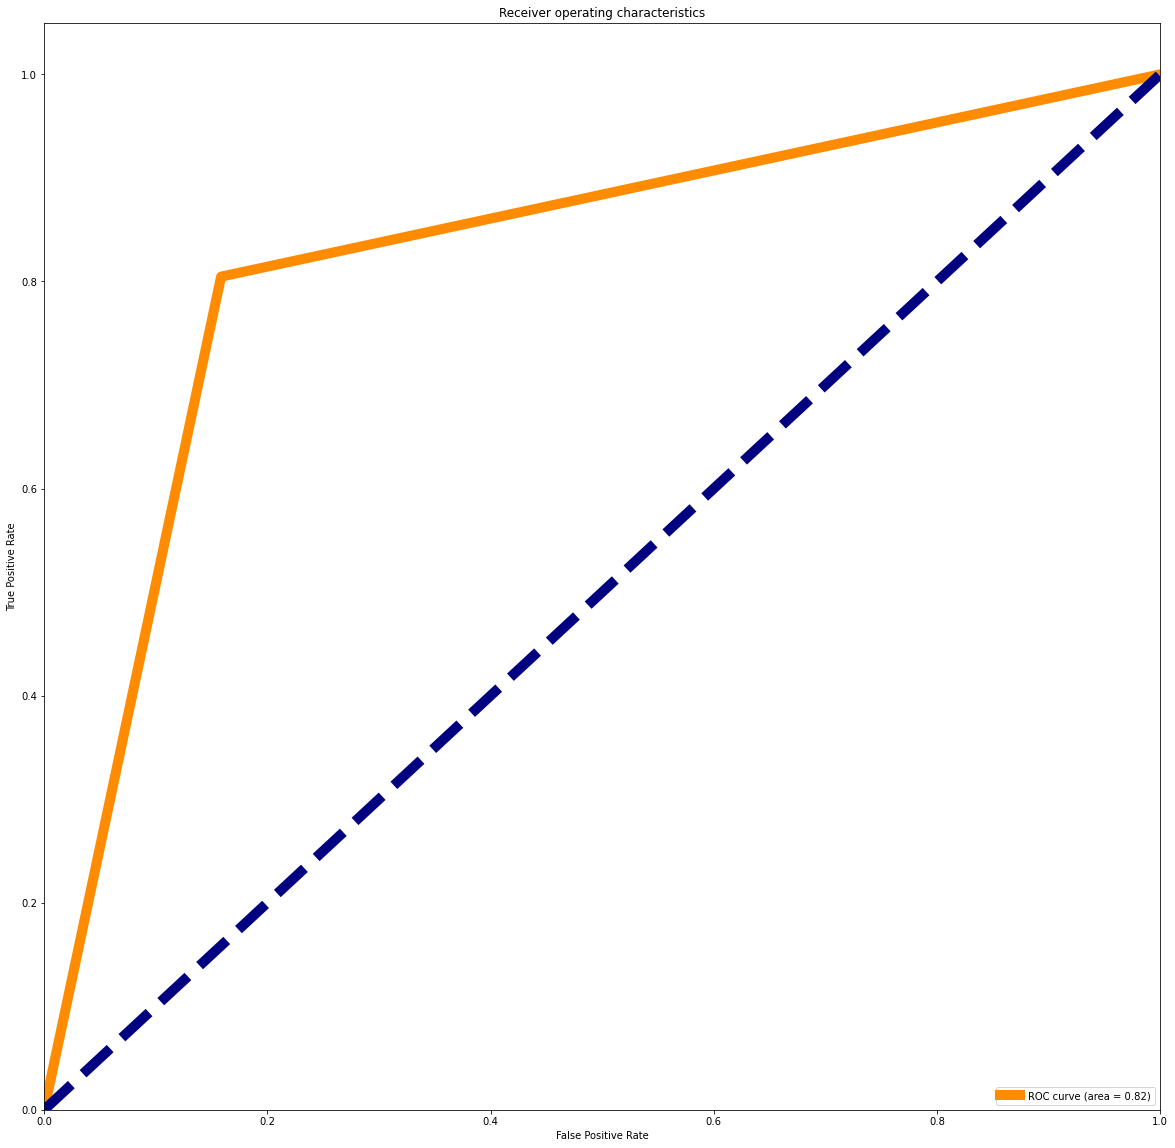

In [120]:
fpr,tpr,threshold=roc_curve(predet,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## HEre 82% of the area is under Auc Roc Curve and it is the best

## Making a dataframe of all the models accuracy score

In [118]:
mm=pd.DataFrame([["LR","76%"],["Decision Tree Classifier","76%"],["KNeighbors Classifier","78%"],["Random Forest Classifier","82%"],["Gradient Boosting","77%"],["Extra Tree Classifier","82%"]],
                    columns=["Model_Name","AccuracyScore"])

mm

,Model_Name,AccuracyScore
0,LR,76%
1,Decision Tree Classifier,76%
2,KNeighbors Classifier,78%
3,Random Forest Classifier,82%
4,Gradient Boosting,77%
5,Extra Tree Classifier,82%


### Here we will go for Extra Tree Classifier as it is giving the best Performance

# Hyperparameter Tuning

In [114]:
from sklearn.model_selection import GridSearchCV


In [119]:
et.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [121]:
#Extra Tree Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300,400,500]}


In [122]:
qq=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [123]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300, 400, 500],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [124]:
qq.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [126]:
gb = ExtraTreesClassifier(criterion ='gini',max_depth=20, n_estimators=200,n_jobs=-2,random_state=10)
et.fit(x_train, y_train)
pred = et.predict(x_test)
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

Accuracy_Score :->  82.6086956521739


## here my accuracy is being increased by 1% ,model is performing 83%

## Now Save the model

In [127]:
#Saving the model using .pkl
import joblib
joblib.dump(et,"CCAR_study.pkl")

['CCAR_study.pkl']

In [128]:
#Loading the saved model
aa=joblib.load("CCAR_study.pkl")

In [129]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 1, 0])

In [130]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069
Predicted,0,1,0,1,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,1,0
Original,0,1,0,1,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0


## My Model is predicting good

# ----------------------------------------------------------------------------------------